In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9146839425731589
0.9294454863971215


In [6]:
print(lr.coef_, lr.intercept_)

[37.43390738] -665.4843268582204


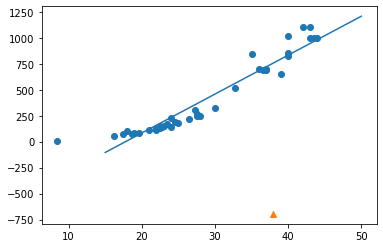

In [7]:
x_new = np.arange(15, 51)
y_new = x_new*lr.coef_ + lr.intercept_

plt.scatter(train_input, train_target)
plt.scatter(38, -695, marker = "^")
plt.plot(x_new, y_new)

plt.show()

In [8]:
train_poly = np.column_stack((train_input, train_input**2))
test_poly = np.column_stack((test_input, test_input**2))

test_poly[:10]

array([[  22.  ,  484.  ],
       [  15.  ,  225.  ],
       [  13.7 ,  187.69],
       [  21.3 ,  453.69],
       [  34.5 , 1190.25],
       [  39.  , 1521.  ],
       [  22.  ,  484.  ],
       [  28.7 ,  823.69],
       [  21.  ,  441.  ],
       [  20.  ,  400.  ]])

In [9]:
lrp = LinearRegression()
lrp.fit(train_poly, train_target)
print(lrp.score(train_poly, train_target))
print(lrp.score(test_poly, test_target))

0.9673459860546079
0.9898953213652255


In [10]:
print(lrp.coef_, lrp.intercept_)

[-20.27620676   0.98063345] 103.9692169186693


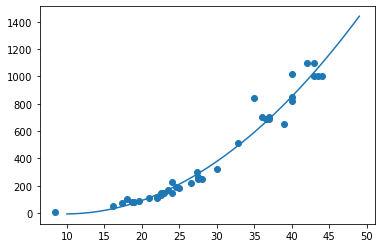

In [11]:
x_new = np.arange(10, 50)
y_new = 83.45 - 18.38 *x_new + 0.94*x_new**2
plt.scatter(train_input, train_target)
plt.plot(x_new, y_new)

plt.show()

In [12]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(type(df))
# df.head()
perch_full = df.to_numpy()
print(type(perch_full))
# print(df.shape)
print(np.shape(perch_full))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(56, 3)


In [13]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [26]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [27]:
lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9961184881979426
0.9532367501023219


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=1)

In [30]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9891423397953192
0.973299721137419


In [31]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

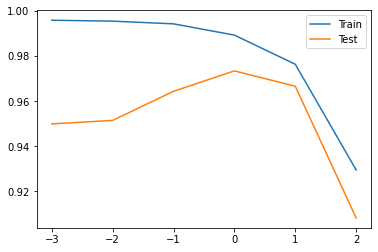

In [32]:
plt.plot(np.log10(alpha_list), train_score, label = 'Train')
plt.plot(np.log10(alpha_list), test_score, label = 'Test')

plt.legend()
plt.show()